In [2]:
# Import all required packages

from scipy.ndimage.filters import convolve
from numpy import interp
from numpy.linalg import inv
import cv2
import numpy as np
import matplotlib.pyplot as plot
import math

## 1.1 Resampling

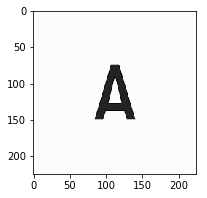

In [34]:
image = cv2.imread("alphabet.png", 0)
plot.imshow(image, cmap="gray")
plot.show()

In [6]:
def mean_filtering(img, filter_size):
    
    for row in range(len(img)-filter_size-1):
        for column in range(len(img[0])-filter_size-1):
            
            # Take an nxn submatrix inside the image
            matrx = img[row:row+filter_size, column:column+filter_size]

            intensity_values = []
            lis = matrx.tolist()

            for element in lis:
                intensity_values += element
            
            # Calculate the mean of pixel values
            mean = sum(intensity_values)/len(intensity_values)
            
            img[row+int((filter_size-1)/2), column+int((filter_size-1)/2)] = mean
    return img

In [5]:
def nn_transformation(image, transformation):
    # Initialize output image
    output_image = np.zeros([len(image), len(image[0])])
    
    for column in range(len(output_image[0])):
        for row in range(len(output_image)):
            coordinate_vector = np.array([column,row,1]).transpose()
            
            # Take the product of inverse transformation and vector
            new_position = np.dot(inv(transformation),coordinate_vector)
            
            # Round off to nearest neighbor
            new_x = int(round(new_position[1]))
            new_y = int(round(new_position[0]))

            if new_x>=0 and new_y>=0 and new_y<len(image[0]) and new_x<len(image):
                output_image[row][column] = image[new_x][new_y]
                
    return output_image


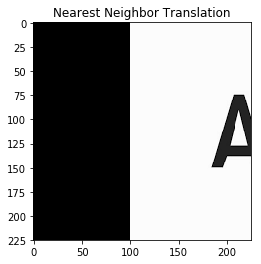

In [86]:
translation = np.array([[1,0,100], [0,1,0], [0,0,1]])
t_nn_img = nn_transformation(image, translation)

plot.imshow(t_nn_img, cmap="gray")
plot.title("Nearest Neighbor Translation")
plot.show()

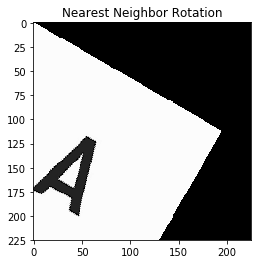

In [87]:
rotation = np.array([[0.866,-0.5,0], [0.5,0.866,0], [0,0,1]])
r_nn_img = nn_transformation(image, rotation)

plot.imshow(r_nn_img, cmap="gray")
plot.title("Nearest Neighbor Rotation")
plot.show()

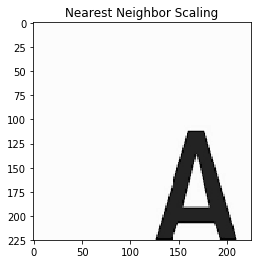

In [88]:
scaling = np.array([[1.5,0,0], [0,1.5,0], [0,0,1]])
s_nn_img = nn_transformation(image, scaling)

plot.imshow(s_nn_img, cmap="gray")
plot.title("Nearest Neighbor Scaling")
plot.show()

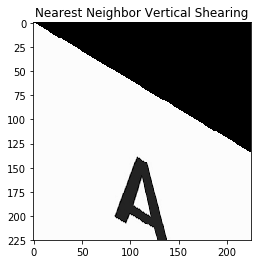

In [89]:
shearing = np.array([[1,0,0], [0.6,1,0], [0,0,1]])
shy_nn_img = nn_transformation(image, shearing)

plot.imshow(shy_nn_img,cmap="gray")
plot.title("Nearest Neighbor Vertical Shearing")
plot.show()

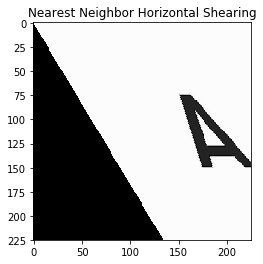

In [90]:
shearing = np.array([[1,0.6,0], [0,1,0], [0,0,1]])
shx_nn_img = nn_transformation(image, shearing)

plot.imshow(shx_nn_img,cmap="gray")
plot.title("Nearest Neighbor Horizontal Shearing")
plot.show()

In [4]:
def bilinear_transformation(image, transformation):
    output_image = np.zeros([len(image), len(image[0])])

    for column in range(len(output_image[0])):
        for row in range(len(output_image)):
            
            coordinate_vector = np.array([column,row,1]).transpose()
            new_position = np.dot(inv(transformation),coordinate_vector)

            x = np.asarray(new_position[1])
            y = np.asarray(new_position[0])
            
            # Initialize the upper and lower limits using floor and ceil values of x and y
            fx0 = np.floor(x).astype(int)
            fx1 = fx0 + 1
            fy0 = np.floor(y).astype(int)
            fy1 = fy0 + 1

            fx0 = np.clip(fx0, 0, image.shape[0]-1)
            fy0 = np.clip(fy0, 0, image.shape[0]-1)
            fx1 = np.clip(fx1, 0, image.shape[0]-1)
            fy1 = np.clip(fy1, 0, image.shape[1]-1)

            f00 = image[fx0,fy0]
            f10 = image[fx1,fy0]
            f01 = image[fx0,fy1]
            f11 = image[fx1,fy1]

            output_image[row][column] = (fx1-x)*(fy1-y)*f00 + (fx1-x)*(y-fy0)*f10 + (x-fx0)*(fy1-y)*f01 + (x-fx0)*(y-fy0)*f11
    return output_image

In [91]:
rotation = np.array([[0.866,-0.5,0], [0.5,0.866,0], [0,0,1]])
r_bi_img = bilinear_transformation(image, rotation)

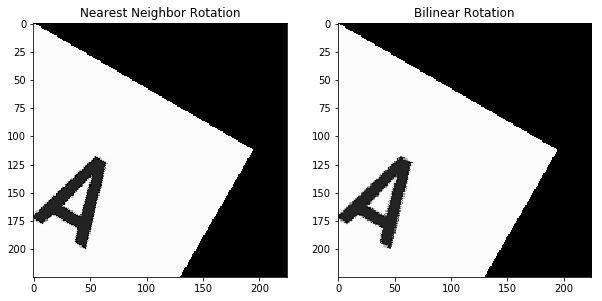

In [93]:
f = plot.figure(figsize=(10,10))

f.add_subplot(1, 2, 1)
plot.title('Nearest Neighbor Rotation')
plot.imshow(r_nn_img,cmap = plot.get_cmap('gray'))

f.add_subplot(1, 2, 2)
plot.title('Bilinear Rotation')
plot.imshow(r_bi_img,cmap = plot.get_cmap('gray'))
plot.show()


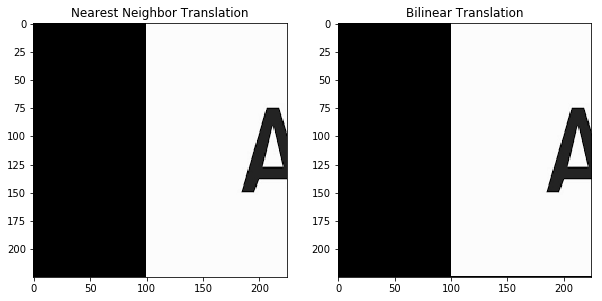

In [95]:
translation = np.array([[1,0,100], [0,1,0], [0,0,1]])
t_bi_img = bilinear_transformation(image, translation)

f = plot.figure(figsize=(10,10))
f.add_subplot(1, 2, 1)
plot.title('Nearest Neighbor Translation')
plot.imshow(t_nn_img,cmap = plot.get_cmap('gray'))

f.add_subplot(1, 2, 2)
plot.title('Bilinear Translation')
plot.imshow(t_bi_img,cmap = plot.get_cmap('gray'))
plot.show()


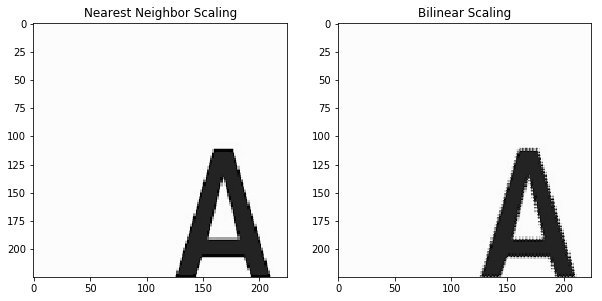

In [96]:
scaling = np.array([[1.5,0,0], [0,1.5,0], [0,0,1]])
s_bi_img = bilinear_transformation(image, scaling)

f = plot.figure(figsize=(10,10))
f.add_subplot(1, 2, 1)
plot.title('Nearest Neighbor Scaling')
plot.imshow(s_nn_img,cmap = plot.get_cmap('gray'))

f.add_subplot(1, 2, 2)
plot.title('Bilinear Scaling')
plot.imshow(s_bi_img,cmap = plot.get_cmap('gray'))
plot.show()


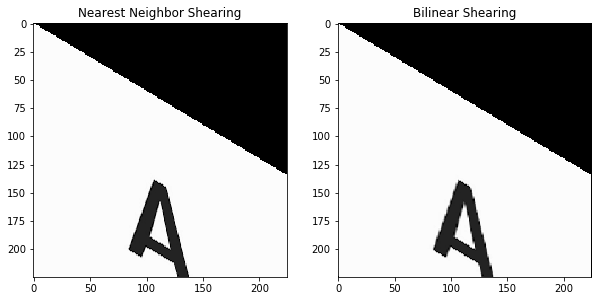

In [97]:
shearing = np.array([[1,0,0], [0.6,1,0], [0,0,1]])
shy_bi_img = bilinear_transformation(image, shearing)

f = plot.figure(figsize=(10,10))
f.add_subplot(1, 2, 1)
plot.title('Nearest Neighbor Shearing')
plot.imshow(shy_nn_img,cmap = plot.get_cmap('gray'))

f.add_subplot(1, 2, 2)
plot.title('Bilinear Shearing')
plot.imshow(shy_bi_img,cmap = plot.get_cmap('gray'))
plot.show()


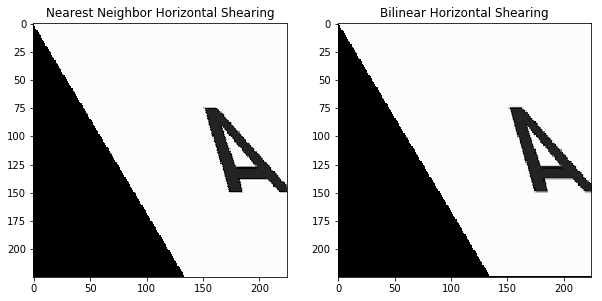

In [98]:
shearing = np.array([[1,0.6,0], [0,1,0], [0,0,1]])
shx_bi_img = bilinear_transformation(image, shearing)

f = plot.figure(figsize=(10,10))
f.add_subplot(1, 2, 1)
plot.title('Nearest Neighbor Horizontal Shearing')
plot.imshow(shx_nn_img,cmap = plot.get_cmap('gray'))

f.add_subplot(1, 2, 2)
plot.title('Bilinear Horizontal Shearing')
plot.imshow(shx_bi_img,cmap = plot.get_cmap('gray'))
plot.show()


In [4]:
def affine_transform(image, translation_x, translation_y, scaling_x, scaling_y, shear_x, shear_y, rotation):
    
    translation_matrix = np.array([[1,0,translation_x], [0,1,translation_y], [0,0,1]])
    scaling_matrix = np.array([[scaling_x,0,0], [0,scaling_y,0], [0,0,1]])
    shearing_matrix = np.array([[1,shear_x,0], [shear_y,1,0], [0,0,1]])
    rad = math.pi*rotation/180
    rotation_matrix = np.array([[math.cos(rad), -math.sin(rad), 0],[math.sin(rad), math.cos(rad), 0],[0, 0, 1]])
    
    temp = np.matmul(translation_matrix, scaling_matrix)
    affine = np.matmul(temp, shearing_matrix)
    affine = np.matmul(affine, rotation_matrix)
    
    output_image = np.zeros([len(image), len(image[0])])

    for column in range(len(output_image[0])):
        for row in range(len(output_image)):    

            coordinate_vector = np.array([column,row,1]).transpose()
            new_position = np.dot(inv(affine),coordinate_vector)

            x = np.asarray(new_position[1])
            y = np.asarray(new_position[0])

            fx0 = np.floor(x).astype(int)
            fx1 = fx0 + 1
            fy0 = np.floor(y).astype(int)
            fy1 = fy0 + 1

            fx0 = np.clip(fx0, 0, image.shape[0]-1)
            fx1 = np.clip(fx1, 0, image.shape[0]-1)
            fy0 = np.clip(fy0, 0, image.shape[1]-1)
            fy1 = np.clip(fy1, 0, image.shape[1]-1)

            f00 = image[fx0, fy0]
            f10 = image[fx1, fy0]
            f01 = image[fx0, fy1]
            f11 = image[fx1, fy1]

            output_image[row][column] = (fx1-x)*(fy1-y)*f00 + (fx1-x)*(y-fy0)*f10 + (x-fx0)*(fy1-y)*f01 + (x-fx0)*(y-fy0)*f11

    return output_image

Enter the translation values: 10 10
Enter the scaling values: 1.2 1.2
Enter the shearing values: 0.3 0.3
Enter the rotation values: 15


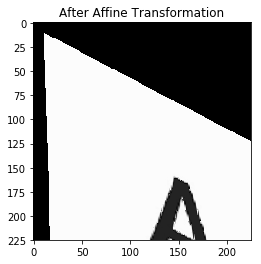

In [5]:
translation_x, translation_y = list(map(float, input("Enter the translation values: ").split()))
scaling_x, scaling_y = list(map(float, input("Enter the scaling values: ").split()))
shear_x, shear_y = list(map(float, input("Enter the shearing values: ").split()))
rot = float(input("Enter the rotation values: "))

img = affine_transform(image, translation_x, translation_y, scaling_x, scaling_y, shear_x, shear_y, rot)
plot.imshow(img,cmap="gray")
plot.title("After Affine Transformation")
plot.show()

## 1.2 Calculation of affine transform from landmarks

In [7]:
points_x=[]
points_y=[]
ix,iy = -1,-1

def collect_points(event,x,y,flags,param):
    global ix,iy
    if event == cv2.EVENT_LBUTTONDBLCLK:
        points_x.append(x)
        points_y.append(y)
        ix,iy = x,y

img = cv2.imread("alphabet.png", 0)
cv2.namedWindow('image')
cv2.setMouseCallback('image',collect_points)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(20) & 0xFF
    if k == 27 or len(points_x)>2:
        break
        
cv2.destroyAllWindows()

In [14]:
X = np.asarray([[points_x[0], points_y[0], 1, 0, 0, 0],
                [0, 0, 0, points_x[0], points_y[0], 1],
                [points_x[1], points_y[1], 1, 0, 0, 0],
                [0, 0, 0, points_x[1], points_y[1],1],
                [points_x[2], points_y[2], 1, 0, 0, 0],
                [0, 0, 0, points_x[2], points_y[2], 1]])

translation = np.array([[1,0,10], [0,1,0], [0,0,1]])
img = cv2.imread("alphabet.png", 0)

transformed_image = nn_transformation(img, translation)
cv2.imwrite("t_img.png", transformed_image)

t_image = cv2.imread("t_img.png", 0)
cv2.namedWindow('image_t')
cv2.setMouseCallback('image_t',draw_circle)

while(1):
    cv2.imshow('image_t',t_image)
    k = cv2.waitKey(0) & 0xFF
    if k == 27 or len(points_x)>5:
        break
        
cv2.destroyAllWindows()


In [15]:
x_d = [points_x[3], points_y[3], points_x[4], points_y[4], points_x[5], points_y[5]]
a = np.matmul(inv(X),x_d)
a = np.reshape(a, [2,3])
a = np.append(a, [[0,0,1]], axis = 0)


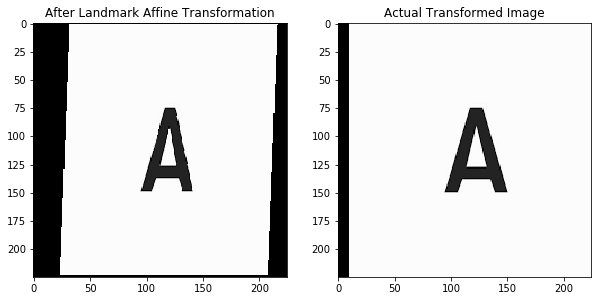

In [16]:
t = nn_transformation(img, a)
# plot.imshow(t, cmap="gray")
# plot.show()

f = plot.figure(figsize=(10,10))
f.add_subplot(1, 2, 1)
plot.title('After Landmark Affine Transformation')
plot.imshow(t,cmap = plot.get_cmap('gray'))
f.add_subplot(1, 2, 2)
plot.title('Actual Transformed Image')
plot.imshow(t_image,cmap = plot.get_cmap('gray'))
plot.show()


## 2. Hough Transform for straight lines without edge orientation

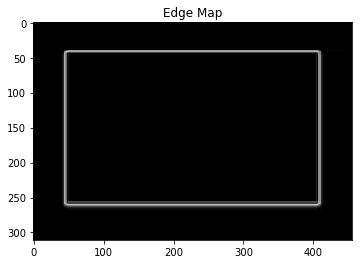

In [11]:
'''Sobel Edge Detection after smoothening'''

# Initialize sobel operators for edge detection
eimage = cv2.imread("rectangle.png",0)
eimage = mean_filtering(eimage, 5)

sobel_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

# Initialize dx and dy
dx = np.zeros((len(eimage), len(eimage[0])))
dy = np.zeros((len(eimage), len(eimage[0])))
theta = np.zeros((len(eimage), len(eimage[0])))
edge_image = np.zeros((len(eimage), len(eimage[0])))

for x in range(len(eimage)-2):
    for y in range(len(eimage[0])-2):
        
        # Calculate dx and dy by multiplying with sobel operators along x and y axis
        gx = np.sum(np.multiply(eimage[x:x+3, y:y+3], sobel_x))
        
        dx[x,y] = gx
                
        gy = np.sum(np.multiply(eimage[x:x+3, y:y+3], sobel_y))                        
        dy[x,y] = gy
        
        # If gx is 0, tan value would be infinity, for which angle is 90 degrees
        if(gx == 0):
            angle = 90.0
        else:
            angle = math.degrees(math.atan(gy/gx))
        
        # Rescaling the range of values to intensity values from 0 to 255
        theta[x, y] = int(interp(angle,[-90, 90], [0, 255]))
        
        # Calculate magnitude of gradient
        edge_image[x, y] = round(math.pow((math.pow(gx, 2) + math.pow(gy, 2)), 0.5))

# Display gradient image


plot.title("Edge Map")
plot.imshow(edge_image, cmap="gray")
plot.show()

In [27]:
'''Get the peaks from the accumulator image'''

def get_peaks(accumulator, thetas, threshold):
    
    mat=np.transpose(np.array(np.nonzero(accumulator>threshold)))
    filt=[0]
    tot=[]

    for count in range (0, len(mat)):
        if count in filt[1:]:
            continue
        tmp=[count]
        
        for j in range (count+1, len(mat)):
            if j in filt[1:]:
                continue
                
            for k in range (0, len(tmp)):
                l=round(np.sqrt((mat[tmp[k]][0]-mat[j][0])**2+(mat[tmp[k]][1]-mat[j][1])**2))
                
                if l<5:
                    filt.append(j)
                    tmp.append(j)
                    break
                    
        tot.append(tmp)
        
    for count_1 in range (0, len(tot)):
         for count_2 in range (0, len(tot[count_1])):
             if count_2==0:
                 highest=accumulator[mat[tot[count_1][count_2]][0],mat[tot[count_1][count_2]][1]]
                    
                 cnt_1=count_1
                 cnt_2=count_2
             else:
                 if accumulator[mat[tot[count_1][count_2]][0],mat[tot[count_1][count_2]][1]]>=highest:
                     highest=accumulator[mat[tot[count_1][count_2]][0],mat[tot[count_1][count_2]][1]]
                     accumulator[mat[tot[cnt_1][cnt_2]][0],mat[tot[cnt_1][cnt_2]][1]]=0
                        
                     cnt_1=count_1
                     cnt_2=count_2
                 else:
                     accumulator[mat[tot[count_1][count_2]][0],mat[tot[count_1][count_2]][1]]=0
    
    p = (np.where(accumulator>threshold)[0]-2*len(accumulator)+1)
    theta = thetas[np.where(accumulator>threshold)[1]]*np.pi/180
    
    return p, theta 


In [9]:
'''Create accumulator matrix to get votes count'''

def create_accumulator(edge_map):
    
    nrows, ncolumns = edge_map.shape
    
    # Range of theta is from -90 to 90 degrees
    thetas = np.linspace(-90.0, 0.0, 91)
    thetas = np.concatenate((thetas, -thetas[len(thetas)-2::-1]))
    diagonal_length = math.ceil(np.sqrt((rows - 1)**2 + (columns - 1)**2))
    
    # Range of p value will be the length of the diagonal
    p = np.linspace(-diagonal_length, diagonal_length, 2*diagonal_length + 1)
    accumulator = np.zeros((len(p), len(thetas)))
    
    for row_count in range(nrows):                               
        for col_count in range(ncolumns):                                  
            for th_count in range(len(thetas)):
                
              # Calculate the value of p based on given formula  
              p_v = col_count*np.cos(thetas[th_count]*np.pi/180.0) + row_count*np.sin(thetas[th_count]*np.pi/180)
              p_index = np.nonzero(np.abs(p-p_v) == np.min(np.abs(p-p_v)))[0]
            
              # Increment vote count for (p, theta) pair
              accumulator[p_index[0], th_count] += 1 
                
    plot.rcParams["figure.figsize"] = [16,9]
    plot.imshow(accumulator)
    plot.title("Hough Accumulator Matrix")
    plot.show()
    
    return accumulator, thetas

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


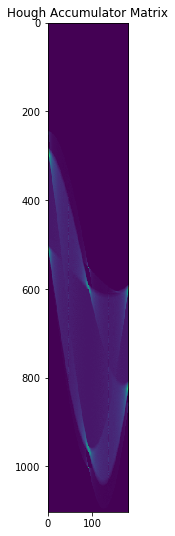

In [27]:
accumulator, thetas = create_accumulator(edge_image)

In [ ]:
p, theta = get_peaks(accumulator, thetas, 50)

In [28]:
def plot_lines(p,theta,image):
  
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a*p
    y0 = b*p

    fig2, ax1 = plot.subplots(ncols=1, nrows=1)
    ax1.imshow(image,cmap="gray")
    
    for i in range (0, len(p)):   
        ax1.plot( [x0[i] + 1000*(-b[i]), x0[i] - 1000*(-b[i])],
                  [y0[i] + 1000*(a[i]), y0[i] - 1000*(a[i])], 
                  'xb-',linewidth=3)
    
    ax1.set_ylim([image.shape[0],0])
    ax1.set_xlim([0,image.shape[1]])
    plot.title("Hough Lines")
    plot.show()

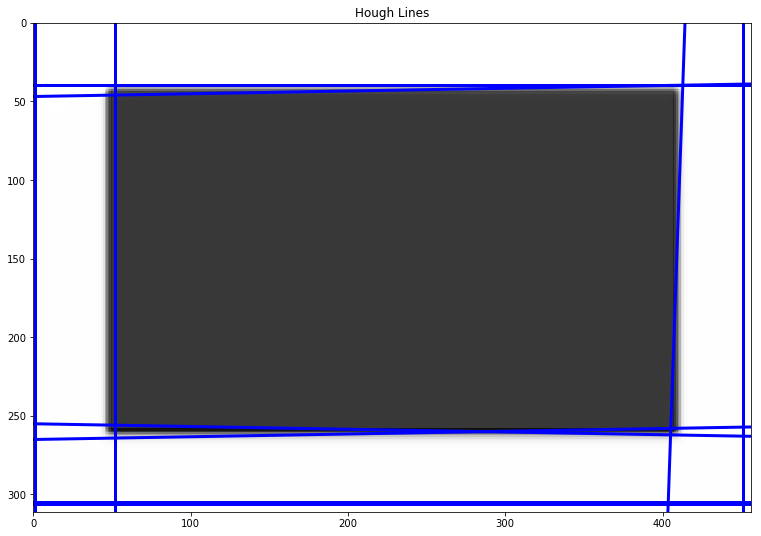

In [29]:
plot_lines(p, theta, eimage)